In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.impute import KNNImputer
from sklearn.cluster import DBSCAN

In [337]:
# model to forecast booking demand for each hotel
df = pd.read_csv(r"C:\Users\teren\Downloads\hotel_bookings_raw.csv")

In [338]:
# lead_time - time between booking and arive
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,INFLATION,INFLATION_CHG,CSMR_SENT,UNRATE,INTRSRT,GDP,FUEL_PRCS,CPI_HOTELS,US_GINI,DIS_INC
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,1.8,0.0,93.1,5.3,0.75,18306.96,194.0,0.187566,41.2,41355.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,1.8,0.0,93.1,5.3,0.75,18306.96,194.0,0.187566,41.2,41355.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,1.8,0.0,93.1,5.3,0.75,18306.96,194.0,0.187566,41.2,41355.0


In [339]:
# type of the columns
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [340]:
# information about records and columns
df.shape

(119390, 43)

In [341]:
# information about numeric columns
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,INFLATION,INFLATION_CHG,CSMR_SENT,UNRATE,INTRSRT,GDP,FUEL_PRCS,CPI_HOTELS,US_GINI,DIS_INC
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,...,119209.000000,119209.000000,119209.000000,119209.000000,119209.000000,119209.000000,119209.000000,119209.000000,119209.000000,119209.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,...,2.043988,-0.008392,93.093092,4.827968,1.120033,18796.312904,157.648724,0.177324,41.151516,41970.477321
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,...,0.203388,0.095700,3.272362,0.279105,0.301925,401.008690,21.373932,0.023984,0.049977,426.739880
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.600000,-0.200000,87.200000,4.300000,0.750000,17991.348000,113.400000,0.107059,41.100000,41182.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,1.900000,-0.100000,91.000000,4.700000,1.000000,18425.306000,149.800000,0.165677,41.100000,41680.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,2.100000,0.000000,93.100000,4.900000,1.000000,18775.459000,161.100000,0.183547,41.200000,41850.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,2.200000,0.100000,96.300000,5.000000,1.250000,19148.194000,171.500000,0.189821,41.200000,42274.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,2.300000,0.100000,98.500000,5.700000,1.750000,19561.896000,204.200000,0.236504,41.200000,42834.000000


In [535]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [343]:
# frequency of counties
df['country'].value_counts()
#  Who can doubt - Portugal is champion! The fock, wine cost near 1 EUR for bottle...

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [344]:
df['arrival_date_year'].unique()

array([2015, 2016, 2017], dtype=int64)

In [345]:
df[df.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,INFLATION,INFLATION_CHG,CSMR_SENT,UNRATE,INTRSRT,GDP,FUEL_PRCS,CPI_HOTELS,US_GINI,DIS_INC
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,1.8,0.0,93.1,5.3,0.75,18306.960,194.0,0.187566,41.2,41355.0
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,1.8,0.0,93.1,5.3,0.75,18306.960,194.0,0.187566,41.2,41355.0
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,1.8,0.0,93.1,5.3,0.75,18306.960,194.0,0.187566,41.2,41355.0
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,1.8,0.0,93.1,5.3,0.75,18306.960,194.0,0.187566,41.2,41355.0
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,1.8,0.0,93.1,5.3,0.75,18306.960,194.0,0.187566,41.2,41355.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,1.7,0.0,95.1,4.4,1.75,19561.896,204.2,0.151972,41.2,42834.0
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,1.7,0.0,95.1,4.4,1.75,19561.896,204.2,0.151972,41.2,42834.0
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,1.7,0.0,95.1,4.4,1.75,19561.896,204.2,0.151972,41.2,42834.0
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,1.7,0.0,95.1,4.4,1.75,19561.896,204.2,0.151972,41.2,42834.0


In [346]:
# delete duplicate
df.drop_duplicates()
df.shape
# no duplicate..

(119390, 43)

In [347]:
# find the missed values:
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             488
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16340
days_in_waiting_list                  0


<Axes: >

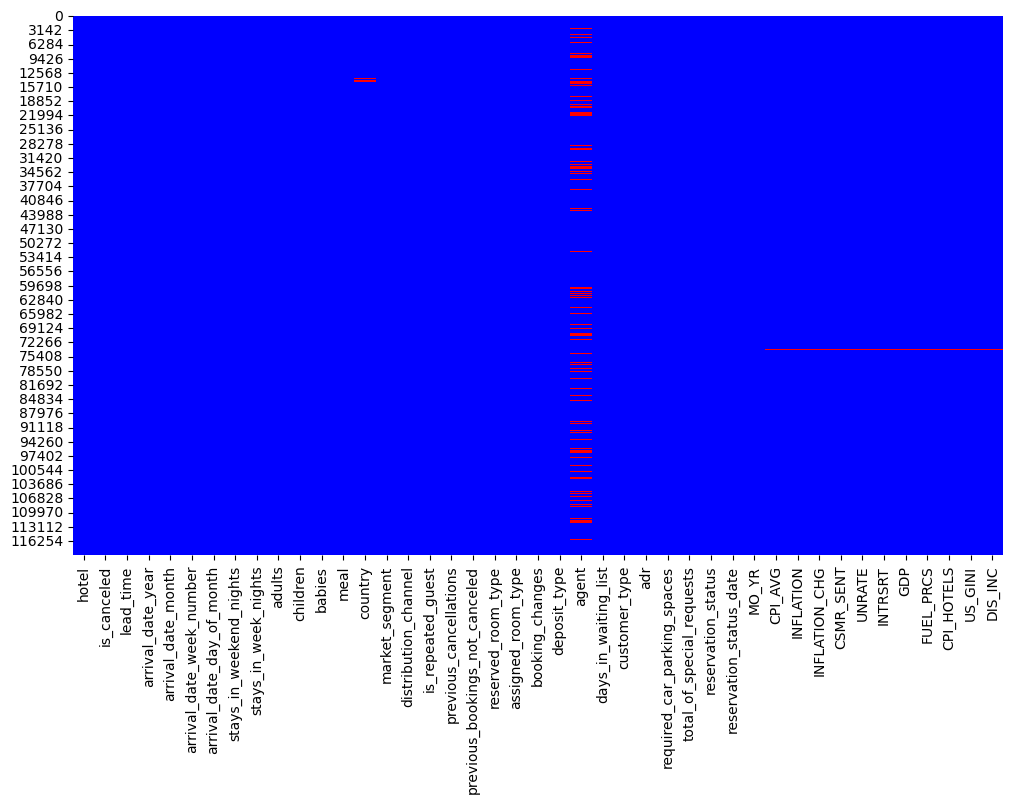

In [348]:
# vizualisation of missed values
plt.rcParams['figure.figsize'] = (12,7)
colors = ['blue', 'red']
sns.heatmap(df.isnull(), cmap = sns.color_palette(colors), cbar = False)

In [ ]:
# CLEAN DATA - what do we do with missed values

In [446]:
# Way No.1 - delete all rows contain missed values
df1 = df.dropna()
df1.shape
# bad idea
print(f'was {df.shape} now is {df1.shape}')

was (119390, 43) now is (102713, 43)


In [349]:
# Way No.2 - delete some rows contained 2 or more missed values
quant_miss_val = 2
# show target rows
df2 = df[df.isnull().sum(axis = 1) > quant_miss_val]
df2.head(3)
df2.shape
# not bad

(181, 43)

<Axes: >

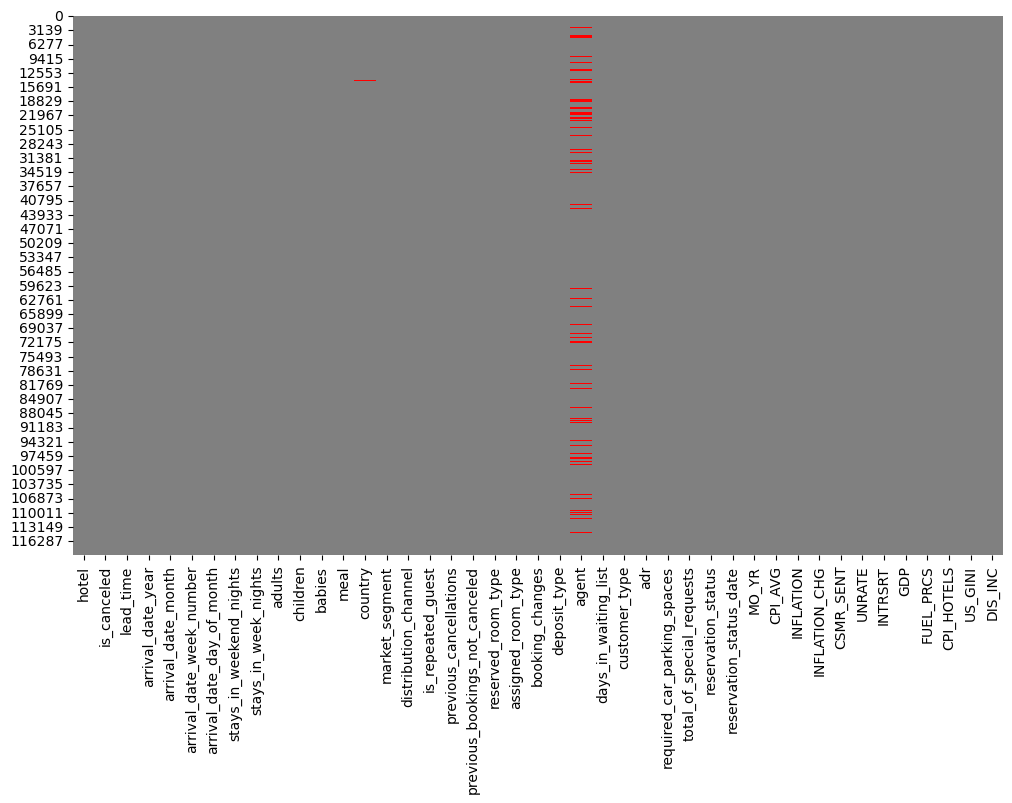

In [418]:
# Way No.2delete target rows
# ID of record does not change!!!!
df3 = df[df.isnull().sum(axis = 1) <= quant_miss_val]
df3.shape
# vizualisation of missed values for df3
plt.rcParams['figure.figsize'] = (12,7)
colors = ['gray', 'red']
sns.heatmap(df3.isnull(), cmap = sns.color_palette(colors), cbar = False)

In [419]:
df3.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             488
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16340
days_in_waiting_list                  0


In [ ]:
# Imputation of empty numeric missed values
# in our case - is quantity of children, country, agent

In [420]:
# Way No 1 text value
df3['country'].unique()
df3.loc[0:102712,['country']] = df3.loc[0:102712,['country']].fillna('XXX')
# !!!! it is incorrect !!!!!

# cond = df3['country'].isnull()
# df3[cond].head(3)
# df3['country'].fillna('XXX')
# df3['agent'] = df3.loc['agent'].fillna(1000)
# df3.loc[df3['x'] > 0, 'agent'] = df3.loc[df3['x'] > 0, 'agent'].fillna(1000)
# df3.loc[0:102712,['agent']] = df3.loc[0:102712, ['agent']].fillna(1000)
# use DBScan! for numeric values

In [421]:
df3['country'].isnull().sum()

0

In [422]:
df3['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'XXX', 'ROU', 'NOR',
       'OMN', 'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA',
       'NLD', 'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN',
       'MOZ', 'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR',
       'UKR', 'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU',
       'TUR', 'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA',
       'KOR', 'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN',
       'GEO', 'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY',
       'KWT', 'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN',
       'LBN', 'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM',
       'MKD', 'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS',
       'COM', 'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI',
       'SAU', 'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU',
       'MDG', 'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI',
       'STP', 'KNA', 

In [423]:
# change XXX country on true country
cond = df3['country'] == 'XXX'
hotel_list = df3[cond]['hotel'].unique().tolist()
print(hotel_list)

['Resort Hotel', 'City Hotel']


In [424]:
# a = df3[(df3['hotel']=='Resort Hotel') | (df3['hotel']=='City Hotel')]['country'].unique().tolist()
a1 = df3[df3['hotel'].isin(hotel_list)]['country'].unique().tolist()
# print(a)
print(a1)
# disaster the fock

['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'XXX', 'ROU', 'NOR', 'OMN', 'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD', 'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ', 'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR', 'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR', 'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR', 'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO', 'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT', 'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN', 'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD', 'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM', 'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU', 'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG', 'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP', 'KNA', 'ETH', 'IRQ', 'HND', 'RWA', 'KHM', 'MCO', 'BGD', 'IMN', 'TJK', 'NIC', 'BEN', 'VGB', 'TZA', 'GAB', 'GHA',

In [425]:
b = df3[['hotel', 'country']].groupby(['hotel']).value_counts().reset_index()
b1 = df3[df3['hotel'].isin(hotel_list)][['hotel', 'country']].groupby(['hotel']).value_counts().reset_index()
c1 = b1[b1['hotel'] == 'City Hotel']['country'].max()
c2 = b1[b1['hotel'] == 'Resort Hotel']['country'].max()
print(f'{c1}, {c2}')

ZWE, ZWE


In [426]:
# change country for two hotel from hotel_list on more frequently
# df3[df3['country'] == 'XXX'].loc[0:102712, ['country']] = c1
df3.loc[(df3['country'] == 'XXX') & (df3.index <= 102712), 'country'] = c1

In [427]:
df3['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'ZWE', 'ROU', 'NOR',
       'OMN', 'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA',
       'NLD', 'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN',
       'MOZ', 'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR',
       'UKR', 'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU',
       'TUR', 'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'ETH', 

In [428]:
# Quantity of children ....
a = df3['children'].mean()
b = df3['children'].median()
print(f'{a} - average & {b} - median - it is funny')

0.1040476490080114 - average & 0.0 - median - it is funny


In [429]:
# imput the quantity of children - 4 missed values
# Use mean (average) value - bad idea (outlets can be significant)
df4['children'].fillna(df4['children'].mean())
df3.loc[0:102712,['children']] = df3.loc[0:102712,['children']].fillna(df4['children'].mean())
df4['children'].fillna(df4['children'].median())
df3.loc[0:102712,['children']] = df3.loc[0:102712,['children']].fillna(df4['children'].median())
# Use median or mean - it is better but no rocket science
df4 = df3
df4[10000:10002]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,INFLATION,INFLATION_CHG,CSMR_SENT,UNRATE,INTRSRT,GDP,FUEL_PRCS,CPI_HOTELS,US_GINI,DIS_INC
10001,Resort Hotel,1,0,2017,February,5,4,0,1,2,...,2.2,-0.1,96.3,4.7,1.25,19148.194,163.5,0.165754,41.2,42274.0
10002,Resort Hotel,1,1,2017,February,5,4,0,1,1,...,2.2,-0.1,96.3,4.7,1.25,19148.194,163.5,0.165754,41.2,42274.0


In [430]:
# Use the KNN method for determination the quantity of children
# eliminate non numeric columns
df3_num_col = df3.select_dtypes('float64')
df3_num_col.head(3)

,children,agent,adr,CPI_AVG,INFLATION,INFLATION_CHG,CSMR_SENT,UNRATE,INTRSRT,GDP,FUEL_PRCS,CPI_HOTELS,US_GINI,DIS_INC
0,0.0,NaN,0.0,238.034,1.8,0.0,93.1,5.3,0.75,18306.96,194.0,0.187566,41.2,41355.0
1,0.0,NaN,0.0,238.034,1.8,0.0,93.1,5.3,0.75,18306.96,194.0,0.187566,41.2,41355.0
2,0.0,NaN,75.0,238.034,1.8,0.0,93.1,5.3,0.75,18306.96,194.0,0.187566,41.2,41355.0


In [431]:
# use KNN n_neighbor - quantity of neighbor cells, weighter - type of using KNN
imputer = KNNImputer(n_neighbors = 5, weights = 'uniform')
# install imputer on the df3_num_col
imputer.fit(df3_num_col)

KNNImputer()

In [435]:
# magic
df3_num_col = pd.DataFrame(imputer.transform(df3_num_col), index = df3_num_col.index, columns = df3_num_col.columns)

In [436]:
# add(change) columns in the original data set
# doesnt work df3['children'] = df3_num_col['children']
df3.loc[0:102712,['children']] = df3_num_col.loc[0:102712,['children']]
# the sme df3['agent'] = df3_num_col['agent']
df3.loc[0:102712,['agent']] = df3_num_col.loc[0:102712,['agent']]

In [437]:
# check
df3.isnull().sum()

hotel                                0
is_canceled                          0
lead_time                            0
arrival_date_year                    0
arrival_date_month                   0
arrival_date_week_number             0
arrival_date_day_of_month            0
stays_in_weekend_nights              0
stays_in_week_nights                 0
adults                               0
children                             0
babies                               0
meal                                 0
country                              0
market_segment                       0
distribution_channel                 0
is_repeated_guest                    0
previous_cancellations               0
previous_bookings_not_canceled       0
reserved_room_type                   0
assigned_room_type                   0
booking_changes                      0
deposit_type                         0
agent                             1523
days_in_waiting_list                 0
customer_type            

In [438]:
df3['agent'].describe()

count    117686.000000
mean         91.919516
std         109.608991
min           1.000000
25%           9.000000
50%          20.000000
75%         217.600000
max         535.000000
Name: agent, dtype: float64

In [440]:
df3['agent'].isnull().sum()

1523

In [441]:
df3[df3['agent'].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,INFLATION,INFLATION_CHG,CSMR_SENT,UNRATE,INTRSRT,GDP,FUEL_PRCS,CPI_HOTELS,US_GINI,DIS_INC
102717,City Hotel,0,28,2016,December,49,1,1,3,1,...,2.2,0.1,98.2,4.7,1.25,18968.041,158.8,0.174506,41.1,42013.0
102718,City Hotel,0,4,2016,December,50,4,1,0,2,...,2.2,0.1,98.2,4.7,1.25,18968.041,158.8,0.174506,41.1,42013.0
102735,City Hotel,0,15,2016,November,49,30,1,4,2,...,2.2,0.1,98.2,4.7,1.25,18968.041,158.8,0.174506,41.1,42013.0
102743,City Hotel,0,3,2016,December,50,5,1,0,1,...,2.2,0.1,98.2,4.7,1.25,18968.041,158.8,0.174506,41.1,42013.0
102753,City Hotel,0,14,2016,December,50,5,1,0,1,...,2.2,0.1,98.2,4.7,1.25,18968.041,158.8,0.174506,41.1,42013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119124,City Hotel,0,0,2017,August,35,29,0,1,1,...,1.7,0.0,96.8,4.3,1.75,19561.896,188.9,0.138513,41.2,42806.0
119151,City Hotel,0,0,2017,August,35,29,0,1,2,...,1.7,0.0,96.8,4.3,1.75,19561.896,188.9,0.138513,41.2,42806.0
119166,City Hotel,0,0,2017,August,35,30,0,1,1,...,1.7,0.0,96.8,4.3,1.75,19561.896,188.9,0.138513,41.2,42806.0
119215,City Hotel,0,2,2017,August,35,31,0,1,1,...,1.7,0.0,95.1,4.4,1.75,19561.896,204.2,0.151972,41.2,42834.0


In [445]:
df_ag = df3.select_dtypes(include=['float64', 'int64'])
imputer = KNNImputer(n_neighbors = 5, weights = 'uniform')
imputer.fit(df_ag)
df_ag = pd.DataFrame(imputer.transform(df_ag), index = df_ag.index, columns = df_ag.columns)

In [452]:
df_ag[df_ag.isnull().sum(axis = 1) == 0]

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,INFLATION,INFLATION_CHG,CSMR_SENT,UNRATE,INTRSRT,GDP,FUEL_PRCS,CPI_HOTELS,US_GINI,DIS_INC
0,0.0,342.0,2015.0,27.0,1.0,0.0,0.0,2.0,0.0,0.0,...,1.8,0.0,93.1,5.3,0.75,18306.960,194.0,0.187566,41.2,41355.0
1,0.0,737.0,2015.0,27.0,1.0,0.0,0.0,2.0,0.0,0.0,...,1.8,0.0,93.1,5.3,0.75,18306.960,194.0,0.187566,41.2,41355.0
2,0.0,7.0,2015.0,27.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.8,0.0,93.1,5.3,0.75,18306.960,194.0,0.187566,41.2,41355.0
3,0.0,13.0,2015.0,27.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.8,0.0,93.1,5.3,0.75,18306.960,194.0,0.187566,41.2,41355.0
4,0.0,14.0,2015.0,27.0,1.0,0.0,2.0,2.0,0.0,0.0,...,1.8,0.0,93.1,5.3,0.75,18306.960,194.0,0.187566,41.2,41355.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0.0,23.0,2017.0,35.0,30.0,2.0,5.0,2.0,0.0,0.0,...,1.7,0.0,95.1,4.4,1.75,19561.896,204.2,0.151972,41.2,42834.0
119386,0.0,102.0,2017.0,35.0,31.0,2.0,5.0,3.0,0.0,0.0,...,1.7,0.0,95.1,4.4,1.75,19561.896,204.2,0.151972,41.2,42834.0
119387,0.0,34.0,2017.0,35.0,31.0,2.0,5.0,2.0,0.0,0.0,...,1.7,0.0,95.1,4.4,1.75,19561.896,204.2,0.151972,41.2,42834.0
119388,0.0,109.0,2017.0,35.0,31.0,2.0,5.0,2.0,0.0,0.0,...,1.7,0.0,95.1,4.4,1.75,19561.896,204.2,0.151972,41.2,42834.0


In [453]:
# df3['agent'] = df_ag['agent']
df3.loc[0:119209,['agent']] = df_ag.loc[0:119209,['agent']]

In [454]:
df3.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

<Axes: >

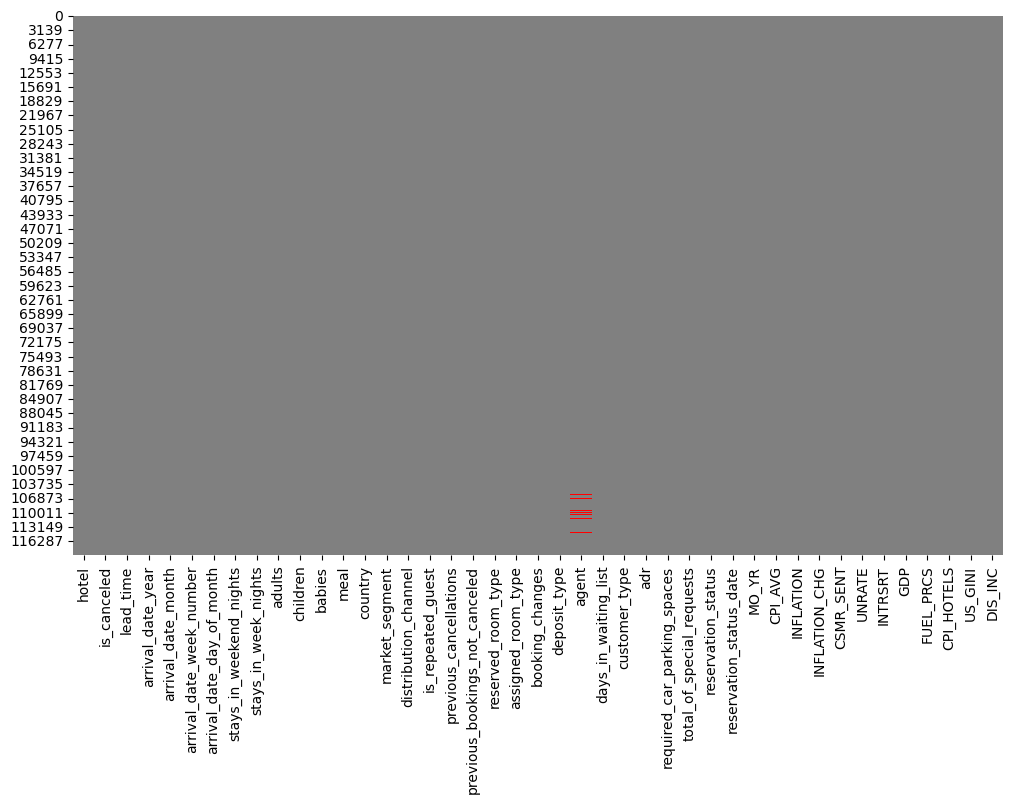

In [366]:
sns.heatmap(df3.isnull(), cmap = sns.color_palette(colors), cbar = False)

In [ ]:
# # Use the KNN method for determination the quantity of children
# # eliminate non numeric columns
# df3_num_col = df3.select_dtypes('float64')
# df3_num_col.head(3)
# # use KNN n_neighbor - quantity of neighbor cells, weighter - type of using KNN
# imputer = KNNImputer(n_neighbors = 5, weights = 'uniform')
# # install imputer on the df3_num_col
# imputer.fit(df3_num_col)
# # magic
# df3_num_col = pd.DataFrame(imputer.transform(df3_num_col), index = df3_num_col.index, columns = df3_num_col.columns)
# # add(change) columns in the original data set
# df3['children'] = df3_num_col['childeren']
# df3['agent'] = df3_num_col['agent']
# df3.sharp
# df3.isnull().sum()

In [434]:
df3.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,INFLATION,INFLATION_CHG,CSMR_SENT,UNRATE,INTRSRT,GDP,FUEL_PRCS,CPI_HOTELS,US_GINI,DIS_INC
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,1.8,0.0,93.1,5.3,0.75,18306.96,194.0,0.187566,41.2,41355.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,1.8,0.0,93.1,5.3,0.75,18306.96,194.0,0.187566,41.2,41355.0


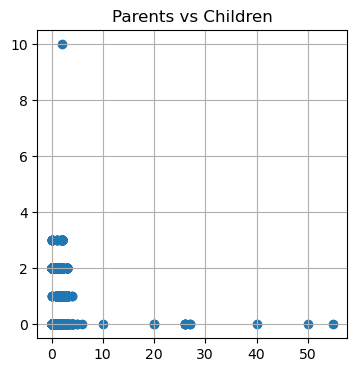

In [368]:
# Check outlets..
plt.rcParams['figure.figsize'] = (4,4)
x = df3['adults']
y = df3['children']
plt.scatter(x,y)
plt.title('Parents vs Children')
plt.grid()
plt.show()
# BINGO I found the very big friendly asian/arabian family 10 children - my congrats!!!
# 55 adults in one room it is very interesting

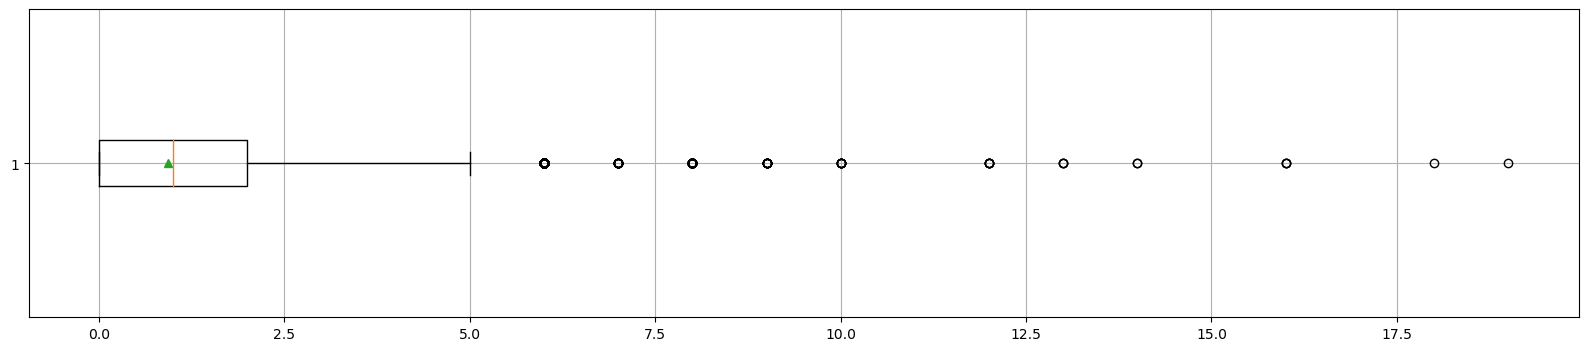

In [369]:
# study 'stays_in_weekend_nights' more closely
plt.rcParams['figure.figsize'] = (20,4)
plt.boxplot(df3['stays_in_weekend_nights'], showmeans = True, vert = False)
plt.grid()
plt.show()
# plt.xlim(0,0.3)

In [370]:
k = 1.5
y = df3['stays_in_weekend_nights']
Q1 = np.quantile(y,0.25)
Q3 = np.quantile(y,0.75)
Q2 = np.median(y)
IRQ = Q3 - Q1
Y1 = Q1 - k * IRQ
Y3 = Q3 + k * IRQ
s = df3[df3['stays_in_weekend_nights'] >= 3]['stays_in_weekend_nights'].count()
print(f'Q1,    Q2,    Q3,    IRQ,    Ymin,    Ymax,    s', sep =  '\t')
print(Q1, Q2, Q3, IRQ, Y1, Y3, s, sep = '\t')
# 1-2 days - it is not rest!
#  2 weeks is impacable alco-tour, ....

Q1,    Q2,    Q3,    IRQ,    Ymin,    Ymax,    s
0.0	1.0	2.0	2.0	-3.0	5.0	3458


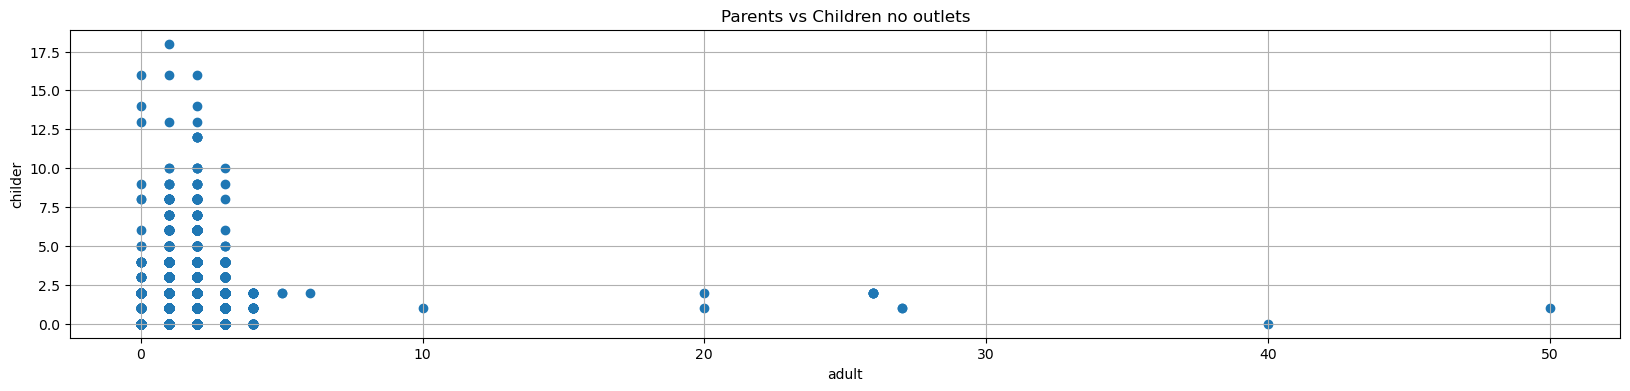

In [371]:
# eliminate outlets
x_new = x[x < x.max()]
y_new = y[y < y.max()]
plt.scatter(x_new, y_new)
plt.title('Parents vs Children no outlets')
plt.xlabel('adult')
plt.ylabel('childer')
plt.grid()
plt.show()

In [372]:
# let analyse all numeric columns
df_std = pd.DataFrame()
df_float = df3.select_dtypes('int64', 'float64')
df_float.shape

(119209, 16)

In [373]:
# let analyse all numeric columns - add columns to df_std
for column in df_float.columns:
    m = df_float[column].mean()
    s = df_float[column].std()
    df_std[column + '_std'] = (df_float[column] - m) / s

In [217]:
df_std.head(2)

,is_canceled_std,lead_time_std,arrival_date_year_std,arrival_date_week_number_std,arrival_date_day_of_month_std,stays_in_weekend_nights_std,stays_in_week_nights_std,adults_std,babies_std,is_repeated_guest_std,previous_cancellations_std,previous_bookings_not_canceled_std,booking_changes_std,days_in_waiting_list_std,required_car_parking_spaces_std,total_of_special_requests_std
0,-0.765466,2.233142,-1.639331,-0.011653,-1.685498,-0.930189,-1.309703,0.248096,-0.081641,-0.17722,-0.101615,-0.091624,4.256710,-0.132025,-0.255078,-0.721523
1,-0.765466,5.935213,-1.639331,-0.011653,-1.685498,-0.930189,-1.309703,0.248096,-0.081641,-0.17722,-0.101615,-0.091624,5.788705,-0.132025,-0.255078,-0.721523


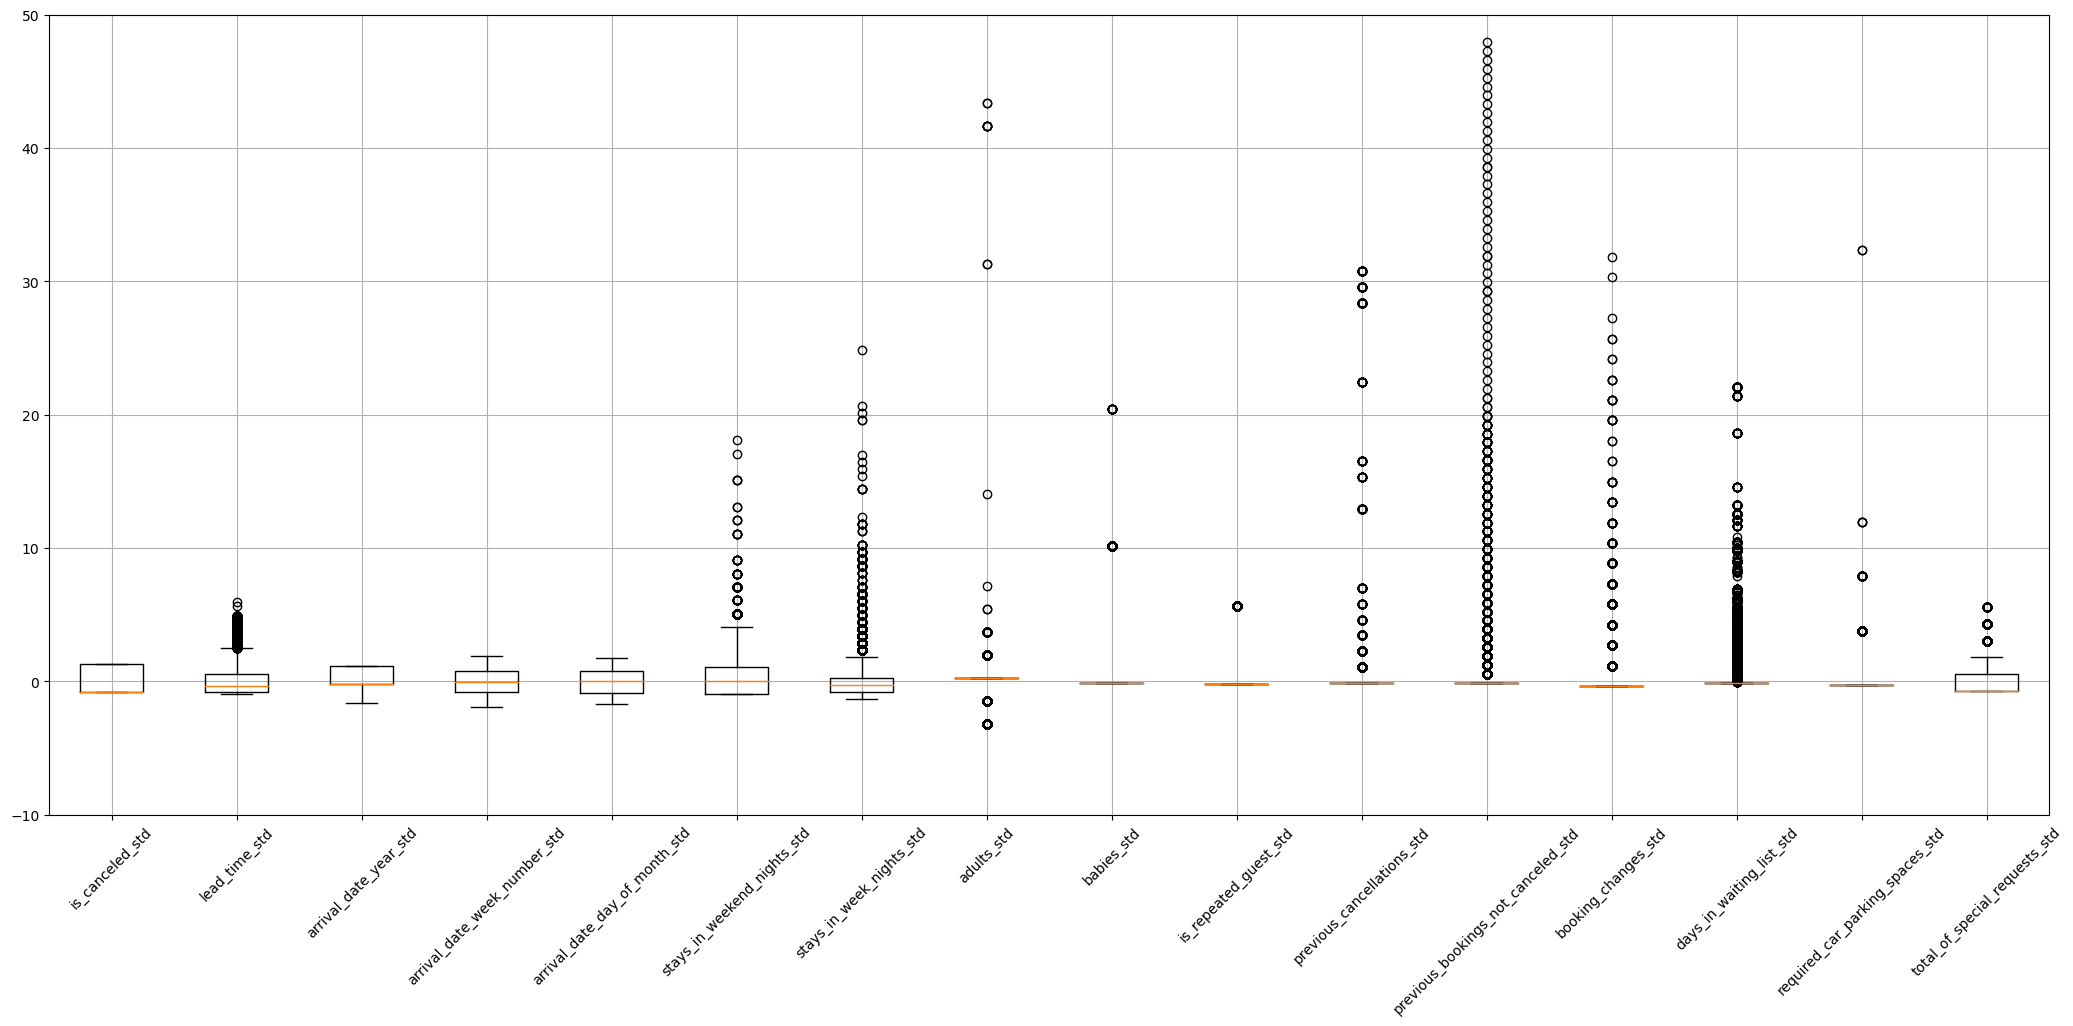

In [374]:
# make graphic
fig = plt.figure(figsize = (20,8))
ax = fig.add_axes([0,0,1,1])
data = []
for column in df_std.columns:
    data.append(df_std[column])
bp_std = ax.boxplot(data, widths = 0.5)
ax.set_xticklabels(df_std.columns, rotation=45)
plt.ylim(-10,50)
plt.grid()
plt.show()
# indexes from 6 to 16 have some quantity of the non-critical outlets.. may be I make a mistake
# neet to be searched : adult 

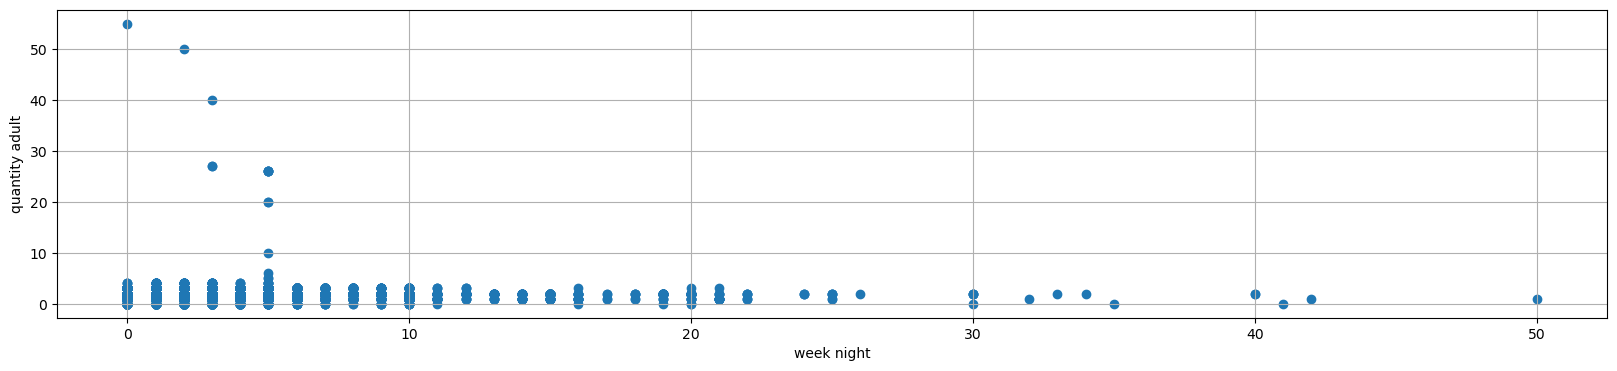

In [375]:
# find the ABNORMAL points using claster analisys
X = df3['stays_in_week_nights']
Y = df3['adults']
plt.scatter(X,Y)
plt.xlabel('week night')
plt.ylabel('quantity adult')
plt.grid()
plt.show()
# Abnormal poins is 55 adults in one room on zero nights and 50 adults in one room on two nights

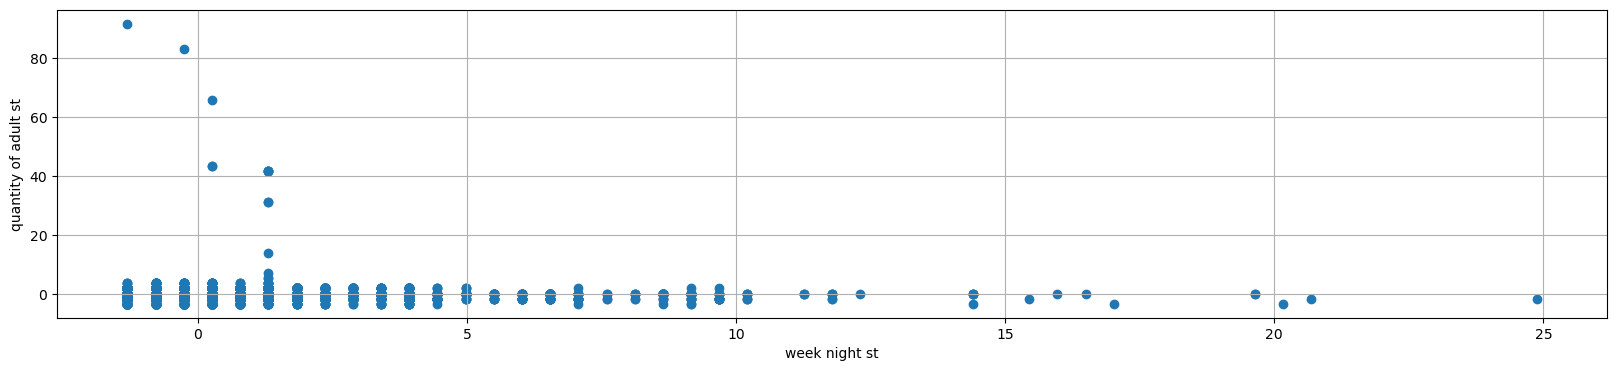

We see impact of outlets on to mean value is so strong


In [376]:
# make standardization of data:
mx, sx = X.mean(), X.std()
my, sy = Y.mean(), Y.std()
Xs = (X - mx) / sx
Ys = (Y - my) / sy
plt.scatter(Xs, Ys)
plt.xlabel('week night st')
plt.ylabel('quantity of adult st')
plt.grid()
plt.show()
print(f'We see impact of outlets on to mean value is so strong')


In [377]:
print(type(Xs), type(Ys))
print(len(Xs), len(Ys))
print(any(pd.isna(Xs)), any(pd.isna(Ys)))
# X = np.column_stack((Xs, Ys))
# print(X)
ls = list(zip(Xs,Ys))

<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>
119209 119209
False False


In [381]:
# using DBScan may be more informativitely
# clustering = DBSCAN(eps = 1.0, min_samples = 3).fit(X)
# labels = clustering.labels_

In [380]:
df_std.head(3)

,is_canceled_std,lead_time_std,arrival_date_year_std,arrival_date_week_number_std,arrival_date_day_of_month_std,stays_in_weekend_nights_std,stays_in_week_nights_std,adults_std,babies_std,is_repeated_guest_std,previous_cancellations_std,previous_bookings_not_canceled_std,booking_changes_std,days_in_waiting_list_std,required_car_parking_spaces_std,total_of_special_requests_std
0,-0.765466,2.233142,-1.639331,-0.011653,-1.685498,-0.930189,-1.309703,0.248096,-0.081641,-0.17722,-0.101615,-0.091624,4.256710,-0.132025,-0.255078,-0.721523
1,-0.765466,5.935213,-1.639331,-0.011653,-1.685498,-0.930189,-1.309703,0.248096,-0.081641,-0.17722,-0.101615,-0.091624,5.788705,-0.132025,-0.255078,-0.721523
2,-0.765466,-0.906588,-1.639331,-0.011653,-1.685498,-0.930189,-0.786042,-1.477013,-0.081641,-0.17722,-0.101615,-0.091624,-0.339275,-0.132025,-0.255078,-0.721523


In [382]:
clustering = DBSCAN(eps = 1.0, min_samples = 3).fit(df_std)
labels = clustering.labels_

In [383]:
print(labels)

[ -1  -1   0 ...  -1 550  -1]


In [384]:
df_std['labels'] = clustering.labels_
# for each data frame show only abnormal objects
df3[df_std['labels'] == -1]
# 10% of data has abnormal values....
# for science it is critical, for presentation it is ok. 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,INFLATION,INFLATION_CHG,CSMR_SENT,UNRATE,INTRSRT,GDP,FUEL_PRCS,CPI_HOTELS,US_GINI,DIS_INC
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,1.8,0.0,93.1,5.3,0.75,18306.960,194.0,0.187566,41.2,41355.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,1.8,0.0,93.1,5.3,0.75,18306.960,194.0,0.187566,41.2,41355.0
20,Resort Hotel,0,37,2015,July,27,1,1,4,1,...,1.8,0.0,93.1,5.3,0.75,18306.960,194.0,0.187566,41.2,41355.0
30,Resort Hotel,0,118,2015,July,27,1,4,10,1,...,1.8,0.0,93.1,5.3,0.75,18306.960,194.0,0.187566,41.2,41355.0
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,...,1.7,-0.1,90.7,5.4,0.75,18193.707,202.6,0.185620,41.2,41290.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119370,City Hotel,0,201,2017,August,35,30,1,4,1,...,1.7,0.0,95.1,4.4,1.75,19561.896,204.2,0.151972,41.2,42834.0
119371,City Hotel,0,175,2017,August,35,31,1,3,2,...,1.7,0.0,95.1,4.4,1.75,19561.896,204.2,0.151972,41.2,42834.0
119376,City Hotel,0,165,2017,August,35,29,1,5,3,...,1.7,0.0,95.1,4.4,1.75,19561.896,204.2,0.151972,41.2,42834.0
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,1.7,0.0,95.1,4.4,1.75,19561.896,204.2,0.151972,41.2,42834.0


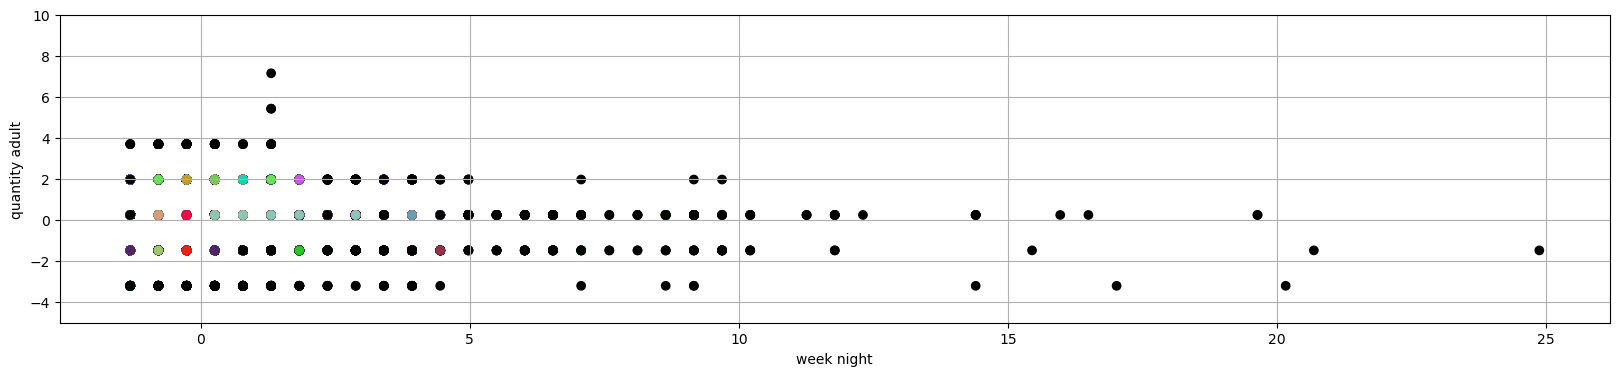

In [385]:
# make vizualization - beautiful very very
def rand_color():
    return(random.randint(0,255)/255, random.randint(0,255)/255,random.randint(0,255)/255)
pallete = {}
color = []
for key in set(labels):
    if key == -1:
        pallete[key] = (0,0,0)
    else:
        pallete[key] = rand_color()
for label in labels:
    color.append(pallete[label])
plt.scatter(Xs, Ys, c = color)
plt.xlabel('week night')
plt.ylabel('quantity adult')
plt.ylim(-5,10)
plt.grid()
plt.show()

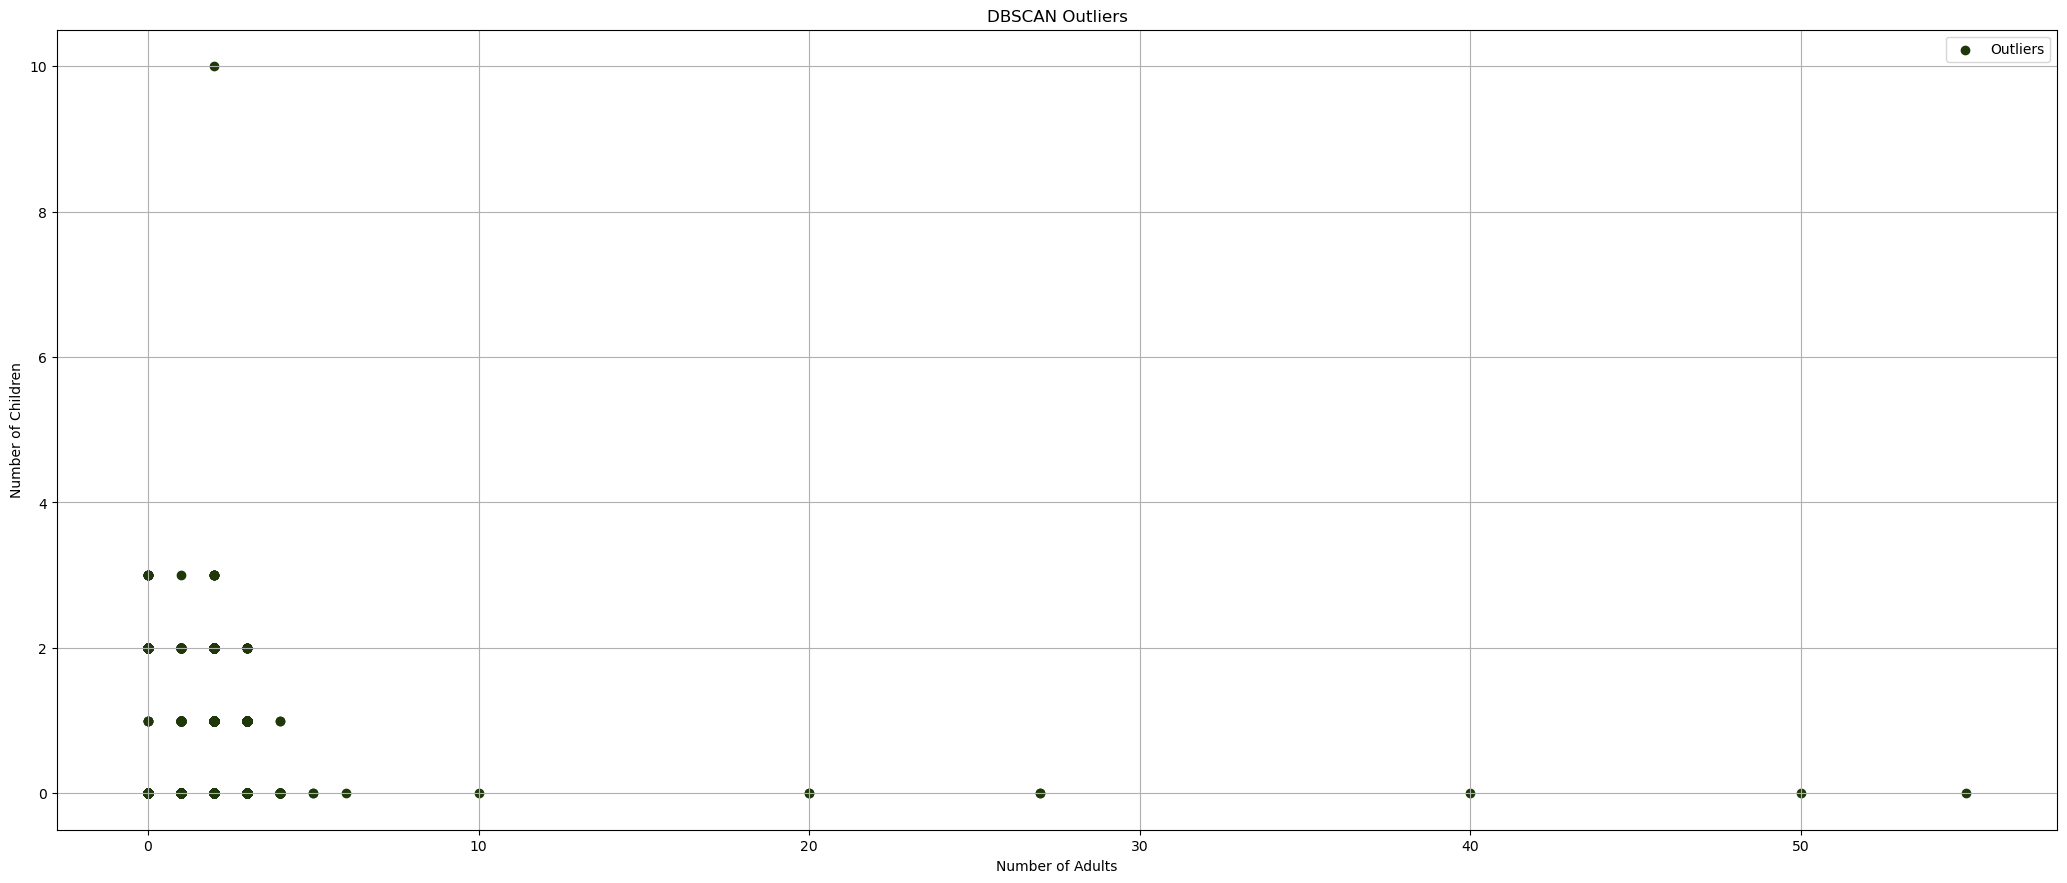

In [386]:
outliers = df3[df_std['labels'] == -1]

fig = plt.figure(figsize=(20, 8))
ax = fig.add_axes([0, 0, 1, 1])

# column access
plt.scatter(outliers['adults'], outliers['children'], color=rand_color(), label='Outliers')

# Use strings for axis labels
plt.title("DBSCAN Outliers")
plt.xlabel("Number of Adults")
plt.ylabel("Number of Children")
plt.legend()
plt.grid(True)
plt.show()

In [387]:
df_std.head(2)

,is_canceled_std,lead_time_std,arrival_date_year_std,arrival_date_week_number_std,arrival_date_day_of_month_std,stays_in_weekend_nights_std,stays_in_week_nights_std,adults_std,babies_std,is_repeated_guest_std,previous_cancellations_std,previous_bookings_not_canceled_std,booking_changes_std,days_in_waiting_list_std,required_car_parking_spaces_std,total_of_special_requests_std,labels
0,-0.765466,2.233142,-1.639331,-0.011653,-1.685498,-0.930189,-1.309703,0.248096,-0.081641,-0.17722,-0.101615,-0.091624,4.256710,-0.132025,-0.255078,-0.721523,-1
1,-0.765466,5.935213,-1.639331,-0.011653,-1.685498,-0.930189,-1.309703,0.248096,-0.081641,-0.17722,-0.101615,-0.091624,5.788705,-0.132025,-0.255078,-0.721523,-1


0.00034829652582612483 with MAX 0.00034890474216955024 with out MAX and delta is -6.082163434254113e-07


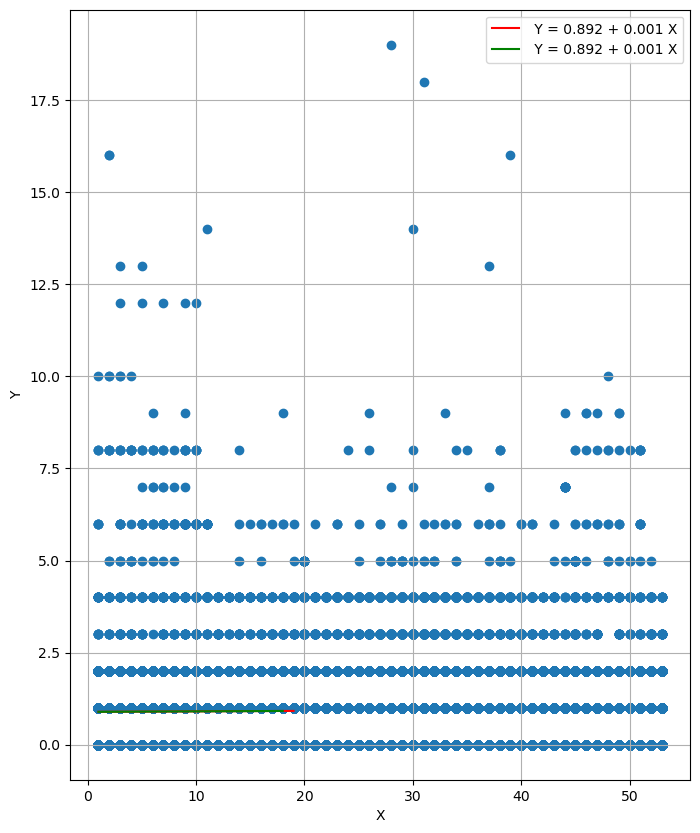

In [388]:
# make linear regression and find the nearest mental institution
X = df3['arrival_date_week_number']
Y = df3['stays_in_weekend_nights']
Xnew = X[Y < Y.max()]
Ynew = Y[Y < Y.max()]
m0 = sps.linregress(X,Y)
m1 = sps.linregress(Xnew, Ynew)
# equation with otulets
x0 = np.array([X.min(),Y.max()])
y0 = m0.intercept + m0.slope * x0
#  equation with out outlets
x1 = np.array([Xnew.min(),Ynew.max()])
y1 = m1.intercept + m1.slope * x1
# coefficient of determination
a = (m0.rvalue)**2
b = (m1.rvalue)**2
print(f'{a} with MAX {b} with out MAX and delta is {a - b}')
plt.figure(figsize = (8,10))
plt.scatter(X,Y)
plt.plot(x0, y0, color = 'red',  label = f' Y = {round(m0.intercept, 3)} + {round(m0.slope,3)} X')
plt.plot(x1, y1, color = 'green',  label = f' Y = {round(m1.intercept, 3)} + {round(m1.slope,3)} X')
plt.xlabel('X')
plt.ylabel('Y')
# plt.ylim(0,4)
plt.legend()
plt.grid()
plt.show()
# conclusion - big data and eliminate one ubnormal value - does make sense

In [455]:
df6 = df3.copy(deep = True)
df6.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,INFLATION,INFLATION_CHG,CSMR_SENT,UNRATE,INTRSRT,GDP,FUEL_PRCS,CPI_HOTELS,US_GINI,DIS_INC
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,1.8,0.0,93.1,5.3,0.75,18306.96,194.0,0.187566,41.2,41355.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,1.8,0.0,93.1,5.3,0.75,18306.96,194.0,0.187566,41.2,41355.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,1.8,0.0,93.1,5.3,0.75,18306.96,194.0,0.187566,41.2,41355.0


In [456]:
df6.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,INFLATION,INFLATION_CHG,CSMR_SENT,UNRATE,INTRSRT,GDP,FUEL_PRCS,CPI_HOTELS,US_GINI,DIS_INC
count,119209.000000,119209.000000,119209.000000,119209.000000,119209.000000,119209.000000,119209.000000,119209.000000,119209.000000,119209.000000,...,119209.000000,119209.000000,119209.000000,119209.000000,119209.000000,119209.000000,119209.000000,119209.000000,119209.000000,119209.000000
mean,0.369460,103.730306,2016.158310,27.158637,15.798212,0.928999,2.501053,1.856185,0.104061,0.007961,...,2.043988,-0.008392,93.093092,4.827968,1.120033,18796.312904,157.648724,0.177324,41.151516,41970.477321
std,0.482661,106.697043,0.706575,13.613915,8.779727,0.998720,1.909634,0.579674,0.398854,0.097510,...,0.203388,0.095700,3.272362,0.279105,0.301925,401.008690,21.373932,0.023984,0.049977,426.739880
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.600000,-0.200000,87.200000,4.300000,0.750000,17991.348000,113.400000,0.107059,41.100000,41182.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,1.900000,-0.100000,91.000000,4.700000,1.000000,18425.306000,149.800000,0.165677,41.100000,41680.000000
50%,0.000000,69.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,2.100000,0.000000,93.100000,4.900000,1.000000,18775.459000,161.100000,0.183547,41.200000,41850.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,2.200000,0.100000,96.300000,5.000000,1.250000,19148.194000,171.500000,0.189821,41.200000,42274.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,2.300000,0.100000,98.500000,5.700000,1.750000,19561.896000,204.200000,0.236504,41.200000,42834.000000


In [458]:
# work with outlets
# find max value
max_val = df6['children'].max()
print(max_val)

10.0


In [459]:
# delete max value - change on NaN
df6.loc[(df6.children == df6.children.max()), 'children'] = np.NaN
df6[df6.isnull().sum(axis = 1) > 0]
max_val = df6['children'].max()
print(max_val)

3.0


In [461]:
df6['children'].describe()

count    119208.000000
mean          0.103978
std           0.397824
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           3.000000
Name: children, dtype: float64

In [462]:
df_num = df6.select_dtypes('float64')
imputer = KNNImputer(n_neighbors = 5, weights = 'uniform')
imputer.fit(df_num)
df_num = pd.DataFrame(imputer.transform(df_num), index = df_num.index, columns = df_num.columns)
df5.loc[0:119209,['children']] = df_num.loc[0:119209,['children']]
df5['children'].describe()

count    119029.000000
mean          0.104003
std           0.397843
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           3.000000
Name: children, dtype: float64

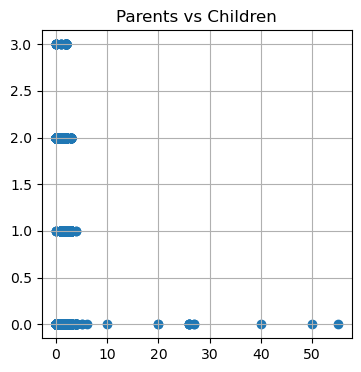

In [463]:
plt.rcParams['figure.figsize'] = (4,4)
x = df6['adults']
y = df6['children']
plt.scatter(x,y)
plt.title('Parents vs Children')
plt.grid()
plt.show()

In [478]:
# add full data column to df6
df6.head(1)
df6['full_data'] = df6.apply(lambda row: f"{row['arrival_date_month']} {row['arrival_date_day_of_month']} {row['arrival_date_year']}", axis=1)
df6['full_data'] = pd.to_datetime(df6['full_data'], format="%B %d %Y")

In [479]:
df6['full_data'].head(5)

0   2015-07-01
1   2015-07-01
2   2015-07-01
3   2015-07-01
4   2015-07-01
Name: full_data, dtype: datetime64[ns]

In [491]:
df3.shape

(119209, 46)

In [494]:
df3.loc[0:119208,'full_data'] = df3.apply(lambda row: f"{row['arrival_date_month']} {row['arrival_date_day_of_month']} {row['arrival_date_year']}", axis=1)
df3.loc[0:119208,'full_data'] = pd.to_datetime(df3['full_data'], format="%B %d %Y")
# df3.loc[0:119208,'full_data'] = pd.to_datetime(df3['full_data'], format="%B %d %Y")
# df3.loc[0:119208, 'full_data'] = pd.to_datetime(df3.loc[0:119208, 'full_data'], format="%B %d %Y")
# df3['full,_data_us'] = df3['full_data'].dt.strftime("%m/%d/%Y")

In [496]:
df3['full_data'].head(3)

0   2015-07-01
1   2015-07-01
2   2015-07-01
Name: full_data, dtype: datetime64[ns]

In [497]:
df3.to_csv("hotel_work.csv", index=False)

In [508]:
df3.drop(['full_data_us'], axis = 1).head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,CSMR_SENT,UNRATE,INTRSRT,GDP,FUEL_PRCS,CPI_HOTELS,US_GINI,DIS_INC,full_data,full_data_eu
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,93.1,5.3,0.75,18306.96,194.0,0.187566,41.2,41355.0,2015-07-01,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,93.1,5.3,0.75,18306.96,194.0,0.187566,41.2,41355.0,2015-07-01,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,93.1,5.3,0.75,18306.96,194.0,0.187566,41.2,41355.0,2015-07-01,2015-07-01
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,93.1,5.3,0.75,18306.96,194.0,0.187566,41.2,41355.0,2015-07-01,2015-07-01
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,93.1,5.3,0.75,18306.96,194.0,0.187566,41.2,41355.0,2015-07-01,2015-07-01


In [509]:
len(df3)

119209

In [510]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119209 entries, 0 to 119389
Data columns (total 46 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119209 non-null  object        
 1   is_canceled                     119209 non-null  int64         
 2   lead_time                       119209 non-null  int64         
 3   arrival_date_year               119209 non-null  int64         
 4   arrival_date_month              119209 non-null  object        
 5   arrival_date_week_number        119209 non-null  int64         
 6   arrival_date_day_of_month       119209 non-null  int64         
 7   stays_in_weekend_nights         119209 non-null  int64         
 8   stays_in_week_nights            119209 non-null  int64         
 9   adults                          119209 non-null  int64         
 10  children                        119209 non-null  float64

In [503]:
df3.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

In [504]:
df3['agent'].value_counts()

9.00      32675
240.00    14486
1.00       7287
14.00      3667
7.00       3574
          ...  
223.68        1
234.76        1
181.16        1
33.72         1
115.64        1
Name: agent, Length: 1563, dtype: int64

In [506]:
df3.columns.tolist()

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date',
 'MO_YR',
 'CPI_AVG',
 'INFLATION',
 'INFLATION_CHG',
 'CSMR_SENT',
 'UNRATE',
 'INTRSRT',
 'GDP',
 'FUEL_PRCS',
 'CPI_HOTELS',
 'US_GINI',
 'DIS_INC',
 'full_data',
 'full_data_us',
 'full_data_eu']

In [511]:
df1.append(df3.sum(axis = 0), ignore_index = True)

C:\Users\teren\AppData\Local\Temp\ipykernel_28204\340975143.py:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.append(df3.sum(axis = 0), ignore_index = True)
C:\Users\teren\AppData\Local\Temp\ipykernel_28204\340975143.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1.append(df3.sum(axis = 0), ignore_index = True)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,INFLATION,INFLATION_CHG,CSMR_SENT,UNRATE,INTRSRT,GDP,FUEL_PRCS,CPI_HOTELS,US_GINI,DIS_INC
0,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,1.8,0.0,93.1,5.3,0.75,1.830696e+04,194.0,0.187566,41.2,4.135500e+04
1,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,1.8,0.0,93.1,5.3,0.75,1.830696e+04,194.0,0.187566,41.2,4.135500e+04
2,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,1.8,0.0,93.1,5.3,0.75,1.830696e+04,194.0,0.187566,41.2,4.135500e+04
3,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,1.8,0.0,93.1,5.3,0.75,1.830696e+04,194.0,0.187566,41.2,4.135500e+04
4,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,1.7,-0.1,90.7,5.4,0.75,1.819371e+04,202.6,0.185620,41.2,4.129000e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102709,City Hotel,0,102,2017,August,35,31,2,5,3,...,1.7,0.0,95.1,4.4,1.75,1.956190e+04,204.2,0.151972,41.2,4.283400e+04
102710,City Hotel,0,34,2017,August,35,31,2,5,2,...,1.7,0.0,95.1,4.4,1.75,1.956190e+04,204.2,0.151972,41.2,4.283400e+04
102711,City Hotel,0,109,2017,August,35,31,2,5,2,...,1.7,0.0,95.1,4.4,1.75,1.956190e+04,204.2,0.151972,41.2,4.283400e+04
102712,City Hotel,0,205,2017,August,35,29,2,7,2,...,1.7,0.0,95.1,4.4,1.75,1.956190e+04,204.2,0.151972,41.2,4.283400e+04


In [529]:
df = df.drop(index=102713)

In [515]:
df3.loc[[100,200,300]]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,UNRATE,INTRSRT,GDP,FUEL_PRCS,CPI_HOTELS,US_GINI,DIS_INC,full_data,full_data_us,full_data_eu
100,Resort Hotel,0,4,2015,July,27,4,2,1,2,...,5.3,0.75,18306.96,194.0,0.187566,41.2,41355.0,2015-07-04,2015-07-04 00:00:00,2015-07-04
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,5.3,0.75,18306.96,194.0,0.187566,41.2,41355.0,2015-07-07,2015-07-07 00:00:00,2015-07-07
300,Resort Hotel,0,36,2015,July,28,11,2,5,2,...,5.3,0.75,18306.96,194.0,0.187566,41.2,41355.0,2015-07-11,2015-07-11 00:00:00,2015-07-11


In [519]:
df3.iloc[100 : 102]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,UNRATE,INTRSRT,GDP,FUEL_PRCS,CPI_HOTELS,US_GINI,DIS_INC,full_data,full_data_us,full_data_eu
100,Resort Hotel,0,4,2015,July,27,4,2,1,2,...,5.3,0.75,18306.96,194.0,0.187566,41.2,41355.0,2015-07-04,2015-07-04 00:00:00,2015-07-04
101,Resort Hotel,0,98,2015,July,27,4,2,1,2,...,5.3,0.75,18306.96,194.0,0.187566,41.2,41355.0,2015-07-04,2015-07-04 00:00:00,2015-07-04


In [521]:
df3.groupby(['hotel']).agg({'is_canceled':'count','lead_time':'sum','adults':'mean', 'stays_in_weekend_nights':'mean'})

,is_canceled,lead_time,adults,stays_in_weekend_nights
hotel,,,,
City Hotel,79150,8653295,1.850638,0.796993
Resort Hotel,40059,3712291,1.867146,1.189820


In [533]:
pd.pivot_table(df3, values = 'is_canceled', columns = ['hotel', 'arrival_date_year'], aggfunc = sum, fill_value = 0)

hotel             City Hotel               Resort Hotel            
arrival_date_year       2015   2016   2017         2015  2016  2017
is_canceled             5824  15407  11691         2137  4930  4054

In [534]:
df3.sample(frac = 0.01)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,UNRATE,INTRSRT,GDP,FUEL_PRCS,CPI_HOTELS,US_GINI,DIS_INC,full_data,full_data_us,full_data_eu
60739,City Hotel,1,61,2016,November,47,19,2,1,2,...,4.9,1.00,18775.459,163.1,0.187797,41.1,41852.0,2016-11-19,2016-11-19 00:00:00,2016-11-19
9017,Resort Hotel,1,39,2016,October,44,23,2,2,2,...,4.9,1.00,18775.459,163.1,0.187797,41.1,41852.0,2016-10-23,2016-10-23 00:00:00,2016-10-23
100949,City Hotel,0,82,2016,October,45,31,1,3,2,...,4.9,1.00,18968.041,157.0,0.163833,41.1,41952.0,2016-10-31,2016-10-31 00:00:00,2016-10-31
21138,Resort Hotel,0,5,2016,February,8,15,1,3,1,...,4.8,1.00,18425.306,113.4,0.197319,41.1,41850.0,2016-02-15,2016-02-15 00:00:00,2016-02-15
35762,Resort Hotel,0,96,2017,April,17,29,1,1,2,...,4.4,1.50,19304.506,173.6,0.163111,41.2,42742.0,2017-04-29,2017-04-29 00:00:00,2017-04-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94032,City Hotel,0,0,2016,July,31,29,0,1,1,...,4.9,1.00,18775.459,157.6,0.188348,41.1,41784.0,2016-07-29,2016-07-29 00:00:00,2016-07-29
80156,City Hotel,1,226,2016,June,25,15,0,4,2,...,5.0,0.75,18332.079,167.4,0.183547,41.2,41526.0,2016-06-15,2016-06-15 00:00:00,2016-06-15
102563,City Hotel,0,2,2016,November,48,25,2,4,1,...,4.7,1.25,18968.041,158.8,0.174506,41.1,42013.0,2016-11-25,2016-11-25 00:00:00,2016-11-25
16231,Resort Hotel,0,8,2015,August,33,13,2,5,2,...,5.2,0.75,18306.960,189.2,0.174096,41.2,41420.0,2015-08-13,2015-08-13 00:00:00,2015-08-13


In [537]:
for idx, row in df[:3].iterrows():
    print(idx, row)

0 hotel                             Resort Hotel
is_canceled                                  0
lead_time                                  342
arrival_date_year                         2015
arrival_date_month                        July
arrival_date_week_number                    27
arrival_date_day_of_month                    1
stays_in_weekend_nights                      0
stays_in_week_nights                         0
adults                                       2
children                                   0.0
babies                                       0
meal                                        BB
country                                    PRT
market_segment                          Direct
distribution_channel                    Direct
is_repeated_guest                            0
previous_cancellations                       0
previous_bookings_not_canceled               0
reserved_room_type                           C
assigned_room_type                           C
booking_cha

In [8]:
import sqlite3
from sqlalchemy import create_engine
from sqlalchemy import inspect
# inspector = inspect(engine)
# print(inspector.get_table_names())
file = r"C:\Users\teren\Downloads\hotel_work.csv"
output = 'df_hotel'
engine = create_engine('sqlite:///db_hotel', echo = False)
df_h = pd.read_csv(file)
df_h.to_sql('sql_h', engine, if_exists = 'replace', index = False)
conn = engine.connect()
inspector = inspect(engine)

In [9]:
print(inspector.get_table_names())  # Should include 'sql_h'


['sql_h']
